# Semester Project - Taerim Lee

In [2]:
from skimage import io

import matplotlib.pyplot as plt
from skimage.color import rgb2gray, rgb2hsv
import numpy as np
from PIL import Image

1.Read a picture of flower field.

In [3]:
img = io.imread("pexels-david-bartus-1166209.jpg")
print(img)

[[[167 165 215]
  [167 165 215]
  [166 164 214]
  ...
  [144 129 186]
  [141 126 183]
  [138 123 180]]

 [[169 167 217]
  [168 166 216]
  [168 166 216]
  ...
  [137 122 179]
  [137 122 179]
  [137 122 179]]

 [[169 167 217]
  [168 166 216]
  [167 165 215]
  ...
  [137 122 179]
  [139 124 181]
  [142 127 184]]

 ...

 [[ 83  65  53]
  [ 84  68  52]
  [ 93  78  57]
  ...
  [ 40  25  44]
  [ 38  25  43]
  [ 35  24  41]]

 [[ 83  65  53]
  [ 83  67  51]
  [ 91  76  55]
  ...
  [ 33  18  37]
  [ 30  17  35]
  [ 28  17  34]]

 [[ 83  65  53]
  [ 81  65  49]
  [ 90  75  54]
  ...
  [ 25  12  30]
  [ 22  11  28]
  [ 19  10  27]]]


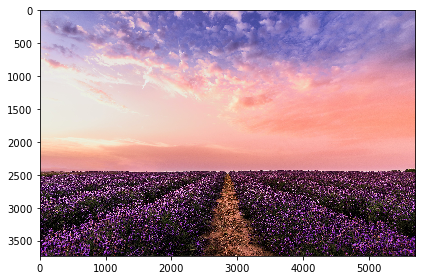

In [4]:
io.imshow(img)

2.Make a fillter of the colors and apply it.

C:\Users\julyi\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
C:\Users\julyi\AppData\Local\Temp/ipykernel_33468/772344391.py:8: UserWarning: takeColorFlowers2.jpg is a low contrast image
  io.imsave('takeColorFlowers2.jpg',img_new2)


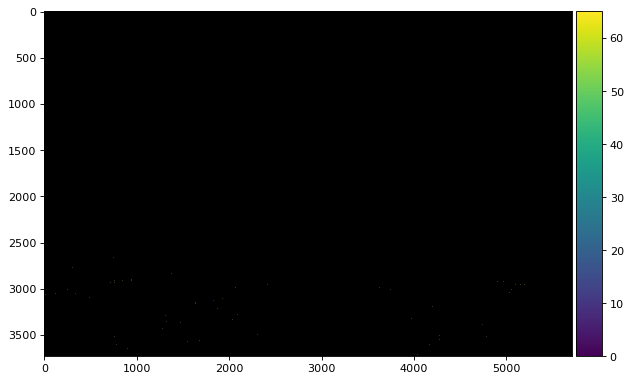

In [5]:
filtered_img2 = (img[:,:,0] > 0) & (img[:,:,1] < 100) & (img[:,:,2] < 100) & (img[:,:,0] < 50) & (img[:,:,1] > 50)
plt.figure(num=None, figsize=(8, 6), dpi=80)
img_new2 = img.copy()
img_new2[:, :, 0] = img_new2[:, :, 0] * filtered_img2
img_new2[:, :, 1] = img_new2[:, :, 1] * filtered_img2
img_new2[:, :, 2] = img_new2[:, :, 2] * filtered_img2
io.imshow(img_new2);
io.imsave('takeColorFlowers2.jpg',img_new2)

2-a(1). replace the black color to white color.

In [6]:
from PIL import Image
img_new_g2 = Image.open('takeColorFlowers2.jpg')

pixels = np.array(img_new_g2)

pixels[np.all(pixels == (0, 0, 0), axis=-1)] = (255,255,255)
img_after2 = Image.fromarray(pixels)
img_after2.show()
img_after2.save('takeWhiteFlowers2.jpg')

2-a(2). Apply gray scale.

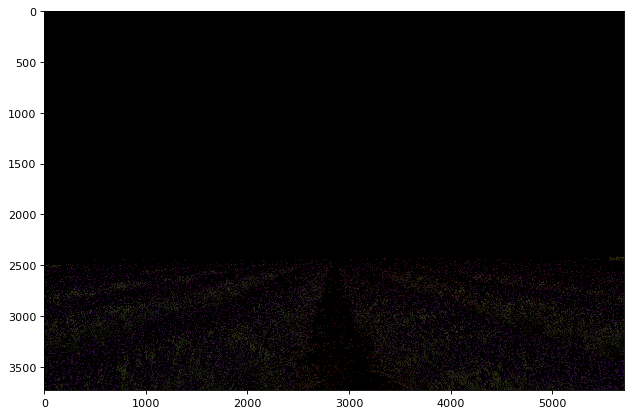

In [7]:
filtered_img = (img[:,:,0] > 0) & (img[:,:,1] < 100) & (img[:,:,2] < 100) & (img[:,:,0] < 50) 
plt.figure(num=None, figsize=(8, 6), dpi=80)
img_new = img.copy()
img_new[:, :, 0] = img_new[:, :, 0] * filtered_img
img_new[:, :, 1] = img_new[:, :, 1] * filtered_img
img_new[:, :, 2] = img_new[:, :, 2] * filtered_img
io.imshow(img_new);
io.imsave('takeColorFlowers.jpg',img_new)

C:\Users\julyi\AppData\Local\Temp/ipykernel_33468/2241580939.py:1: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  grayscale = rgb2gray(filtered_img)


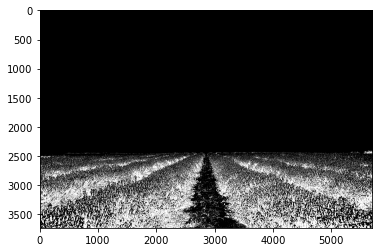

In [8]:
grayscale = rgb2gray(filtered_img)
plt.imshow(grayscale, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()
plt.imsave('flowergray_filter.jpg', grayscale, cmap='gray')


2-b(2). change the black pixels to white pixels.

In [9]:
img_new_g = Image.open('flowergray_filter.jpg')

pixels = np.array(img_new_g)

pixels[np.all(pixels == (0, 0, 0), axis=-1)] = (255,255,255)
img_after = Image.fromarray(pixels)
img_after.show()
img_after.save('takeWhiteFlowers_filter.jpg')

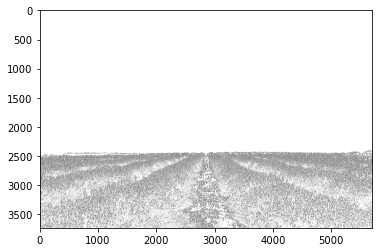

In [10]:
img  =  Image.open('takeWhiteFlowers_filter.jpg')
plt.imshow(img)


In [11]:
img.size[0]

5707

In [12]:
img.size[1]

3731

In [13]:
ticklx = np.linspace(0, 100, 6)
tickly = np.linspace(0, 100, 6)
xy2imgxy = lambda x,y: (img.size[0] * x / np.max(ticklx),\
                        img.size[1] * (np.max(tickly) - y) / np.max(tickly))

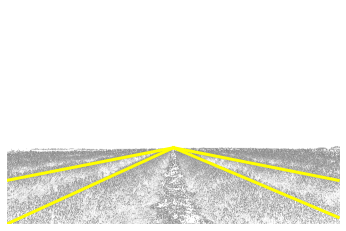

In [14]:
fig,ax  =  plt.subplots() 
ax.imshow(img) 
ax.spines[ 'top' ].set_visible( False ) 
ax.spines[ 'left' ].set_visible( False ) 
ax.spines[ 'bottom' ].set_visible( False ) 
ax.spines[ 'right' ].set_visible( False ) 
ax.set_xticks([]) 
ax.set_yticks([]) 
plt.imshow(img)
px  =  np.linspace(0, 50) # left
py  =  np.linspace(0, 35) 
imgx ,imgy  =  xy2imgxy( px , py ) 
ax.plot( imgx, imgy, color ="yellow" , lw = 3 )
px  =  np.linspace(0 , 50) # left
py  =  np.linspace(20 , 35) 
imgx ,imgy  =  xy2imgxy( px , py ) 
ax.plot( imgx, imgy, color ="yellow" , lw = 3 )
px  =  np.linspace(50 , 99.5) # right
py  =  np.linspace(35 , 3) 
imgx ,imgy  =  xy2imgxy( px , py ) 
ax.plot( imgx, imgy, color ="yellow" , lw = 3 )
px  =  np.linspace(50 , 99.5) # right
py  =  np.linspace(35 , 20) 
imgx ,imgy  =  xy2imgxy( px , py ) 
ax.plot( imgx, imgy, color ="yellow" , lw = 3 )

# Save figure. 
plt.savefig( "line_flowers.png" , bbox_inches = "tight" , pad_inches = 0.02 , dpi = 250 ) 
plt.imshow(img)

In [15]:
from sklearn.linear_model import LinearRegression
img  =  io.imread('takeWhiteFlowers_filter.jpg')
grayscale = rgb2gray(img)
pixels = np.array(grayscale)
pixels

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.01568627, 0.98039216, 0.10196078, ..., 1.        , 1.        ,
        1.        ],
       [0.03137255, 1.        , 0.99215686, ..., 1.        , 1.        ,
        1.        ],
       [1.        , 0.        , 0.00392157, ..., 1.        , 1.        ,
        1.        ]])

Conclustion of section 1: the 2-b method is better than 2-a.

In [16]:
img = Image.open('takeColorFlowers.jpg')

pixels = np.array(img)


pixels[np.all(pixels != (19, 10, 27), axis=-1)] = (255,255,255)
    
    
img_after = Image.fromarray(pixels)
img_after.show()
img_after.save('finalFlowers_filter.jpg')

RGB to HSV

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


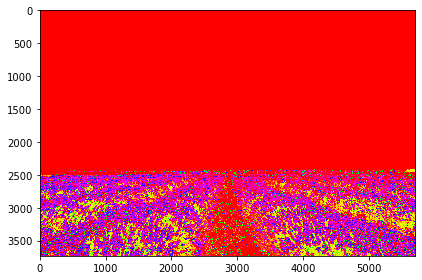

In [17]:
img = io.imread('takeColorFlowers.jpg')
hsv_img = rgb2hsv(img)
hue_img = hsv_img[:, :, 0]

io.imshow(hue_img, cmap='hsv')
io.imsave('takeColorFlowers.jpg',hue_img)

In [5]:
import os
path = "takeColorFlowers.jpg"
os.path.exists(path)

True

In [ ]:
import cv2
import numpy as np
from PIL import Image

im = Image.open("pexels-david-bartus-1166209.jpg")
size = 800, 600
im_resized = im.resize(size, Image.ANTIALIAS)
im_resized.save("my_image_resized.png", "PNG")

frame = cv2.imread('my_image_resized.png')

hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

low_purple = np.array([128, 0, 32])
high_purple = np.array([200, 70, 200])
purple_mask = cv2.inRange(hsv_frame, low_purple, high_purple)
purple = cv2.bitwise_and(frame, frame, mask = purple_mask)

cv2.imshow("image", frame)
cv2.imshow("purple mask", purple_mask)
cv2.imshow("purple", purple)

cv2.imwrite("purple1.jpg", purple)
cv2.imwrite("purple mask1.jpg", purple_mask)

cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import cv2
import numpy as np
from PIL import Image

im = Image.open("pexels-david-bartus-1166209.jpg")
size = 800, 600
im_resized = im.resize(size, Image.ANTIALIAS)
im_resized.save("my_image_resized.png", "PNG")

frame = cv2.imread('my_image_resized.png')

hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

low_purple = np.array([165, 0, 32])
high_purple = np.array([200, 70, 200])
purple_mask = cv2.inRange(hsv_frame, low_purple, high_purple)
purple = cv2.bitwise_and(frame, frame, mask = purple_mask)

cv2.imshow("image", frame)
cv2.imshow("purple mask", purple_mask)
cv2.imshow("purple", purple)

cv2.imwrite("purple2.jpg", purple)
cv2.imwrite("purple mask2.jpg", purple_mask)

cv2.waitKey(0)
cv2.destroyAllWindows()


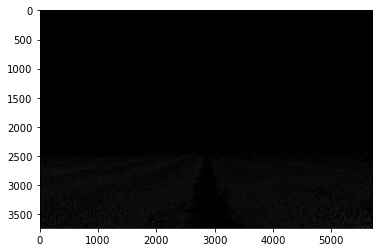

In [24]:
import cv2 
hue_img =hue_img + 60

# if pixel values become > 180, subtract 180 
cond = hue_img[:, :] > 110
hue_img[cond] = hue_img[cond] - 180

# assign the modified hue channel to hsv image
img[:,:,0] = hue_img

im = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)

plt.imshow(im)

plt.savefig("hue_flowers.png") 

In [25]:
pixels[np.all(pixels == (225, 0, 0), axis=-1)] = (255,255,255)
img_after = Image.fromarray(pixels)
img_after.show()


In [26]:
import seaborn as sns

In [30]:
img_hue = io.imread("hue_flowers.png")
pixels = np.array(img_hue)
pixels

array([[[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       ...,

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255

## 2. second section

Read a picture of an apple achard.

In [3]:
img_g = io.imread("sky-view-of-rows-of-apple-trees.jpg")
print(img_g)

[[[67 53 88]
  [72 58 93]
  [71 57 92]
  ...
  [74 80 76]
  [38 44 40]
  [61 67 63]]

 [[61 47 82]
  [67 53 88]
  [71 57 92]
  ...
  [70 76 72]
  [51 57 53]
  [66 72 68]]

 [[60 46 81]
  [63 49 84]
  [66 52 87]
  ...
  [65 71 67]
  [65 71 67]
  [76 82 78]]

 ...

 [[64 73 72]
  [63 72 71]
  [80 86 84]
  ...
  [24 37 45]
  [14 23 32]
  [10 17 27]]

 [[54 66 62]
  [69 80 76]
  [70 81 77]
  ...
  [ 6 19 27]
  [ 7 16 25]
  [ 9 16 26]]

 [[61 76 71]
  [73 88 83]
  [86 98 94]
  ...
  [ 1 14 22]
  [ 3 13 22]
  [ 5 12 22]]]


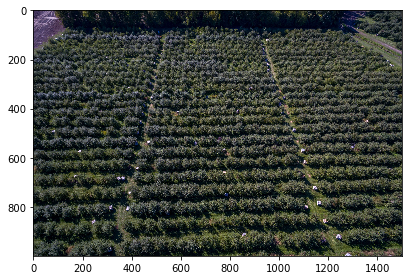

In [4]:
io.imshow(img_g)

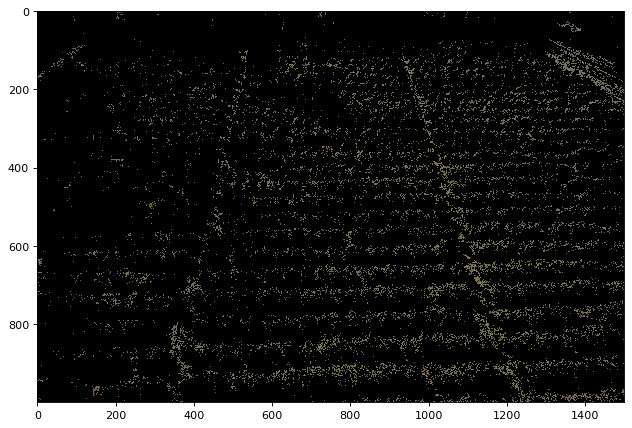

In [5]:
filtered_img_g = (img_g[:,:,0] > 100) & (img_g[:,:,1] < 130) & (img_g[:,:,2] < 100)
plt.figure(num=None, figsize=(8, 6), dpi=80)
img_new_g = img_g.copy()
img_new_g[:, :, 0] = img_new_g[:, :, 0] * filtered_img_g
img_new_g[:, :, 1] = img_new_g[:, :, 1] * filtered_img_g
img_new_g[:, :, 2] = img_new_g[:, :, 2] * filtered_img_g
io.imshow(img_new_g);
io.imsave('takeColorApple.jpg',img_new_g)

In [23]:

img_new_g = Image.open('takeColorApple.jpg')

pixels = np.array(img_new_g)

pixels[np.all(pixels == (0, 0, 0), axis=-1)] = (255,255,255)
img_after = Image.fromarray(pixels)
img_after.show()
img_after.save('finalApple_filter.jpg')

In [25]:

img_new_g = Image.open('finalApple_filter.jpg')

pixels = np.array(img_new_g)

pixels[np.all(pixels != (211,211,211), axis=-1)] = (255,255,255)
img_after = Image.fromarray(pixels)
img_after.show()
img_after.save('finalGray_filter.jpg')

In [ ]:

img_new_g = Image.open('finalApple_filter.jpg')

pixels = np.array(img_new_g)

pixels[np.all(pixels != (211,211,211), axis=-1)] = (255,255,255)
img_after = Image.fromarray(pixels)
img_after.show()
img_after.save('finalGray_filter.jpg')

In [42]:
from skimage import filters
from skimage.morphology import disk
img_filter = io.imread('finalGray_filter.jpg')
med_filter_img = filters.median(img_filter)
med_filter_img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

C:\Users\julyi\AppData\Local\Temp/ipykernel_59068/3094567241.py:1: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  grayscale_g = rgb2gray(filtered_img_g)


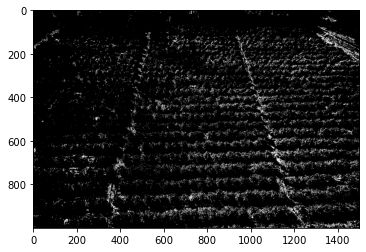

In [8]:
grayscale_g = rgb2gray(filtered_img_g)
plt.imshow(grayscale_g, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()
plt.imsave('applegray.jpg', grayscale_g, cmap='gray')

In [53]:

# it is really easy to apply if it is a picture of trees, but if these are flowers, we need to specify much specific condidtions.
# we might have some more options that we can put more conditions some how.
# The minimum num is 3
def getCololedImage(image, sign1, col1, sign2, col2, sign3, col3):
    img = io.imread(image)
    if sign1 == "<":
        if sign2 == "<":
            if sign3 == "<":
                filtered_img_g = (img_g[:,:,0] < col1) & (img_g[:,:,1] < col2) & (img_g[:,:,2] < col3)
            else:
                filtered_img_g = (img_g[:,:,0] < col1) & (img_g[:,:,1] < col2) & (img_g[:,:,2] > col3)
        else:
            if sign3 == "<":
                filtered_img_g = (img_g[:,:,0] < col1) & (img_g[:,:,1] > col2) & (img_g[:,:,2] < col3)
            else:
                filtered_img_g = (img_g[:,:,0] < col1) & (img_g[:,:,1] > col2) & (img_g[:,:,2] > col3)
    else:
        if sign2 == "<":
            if sign3 == "<":
                filtered_img_g = (img_g[:,:,0] > col1) & (img_g[:,:,1] < col2) & (img_g[:,:,2] < col3)
            else:
                filtered_img_g = (img_g[:,:,0] > col1) & (img_g[:,:,1] < col2) & (img_g[:,:,2] > col3)
        else:
            if sign3 == "<":
                filtered_img_g = (img_g[:,:,0] > col1) & (img_g[:,:,1] > col2) & (img_g[:,:,2] < col3)
            else:
                filtered_img_g = (img_g[:,:,0] > col1) & (img_g[:,:,1] > col2) & (img_g[:,:,2] > col3)
    plt.figure(num=None, figsize=(8, 6), dpi=80)
    img_new_g = img_g.copy()
    img_new_g[:, :, 0] = img_new_g[:, :, 0] * filtered_img_g
    img_new_g[:, :, 1] = img_new_g[:, :, 1] * filtered_img_g
    img_new_g[:, :, 2] = img_new_g[:, :, 2] * filtered_img_g
    return(io.imshow(img_new_g));

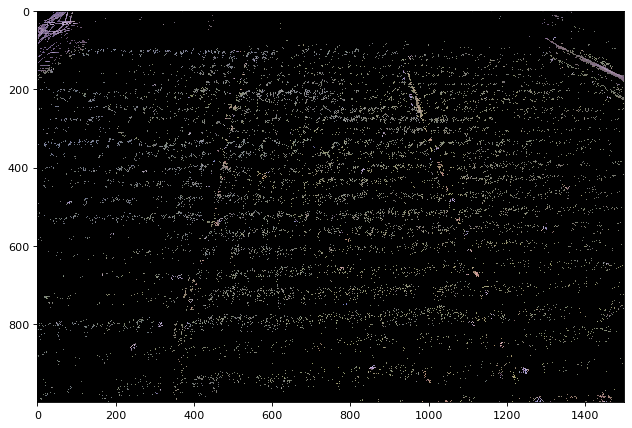

In [54]:
getCololedImage('pexels-david-bartus-1166209.jpg', '>' ,100, '<' ,180, '>' ,100)